In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
# Import results generated from strategy.ipynb script
df_results = pd.read_csv('results.csv')
df_results = df_results.drop(columns='Unnamed: 0')

In [12]:
# Calculate mean, max and min returns for each SMA, holding period and signal combination
df_trades = df_results.loc[~df_results['Signal'].isna()]
df_returns = df_trades.groupby(['SMA_periods','HP']).agg(mean=('Trade','mean'),max=('Trade','max'),min=('Trade','min'),number_of_trades=('Trade','count')).reset_index()
df_returns.head(5).sort_values('mean',ascending=False)

,SMA_periods,HP,mean,max,min,number_of_trades
3,5.0,35,0.018866,0.338737,-0.309413,136
4,5.0,45,0.012446,0.593864,-0.252281,107
1,5.0,15,0.002632,0.346564,-0.160552,281
0,5.0,5,0.000231,0.236491,-0.153478,628
2,5.0,25,-0.001659,0.240912,-0.445198,182


In [25]:
# Get unique SMA values to plot
print([x for x in df_returns['SMA_periods'].unique()])

[5.0, 25.0, 45.0, 65.0, 85.0, 105.0, 125.0, 145.0, 165.0, 185.0, 205.0, 225.0, 245.0]


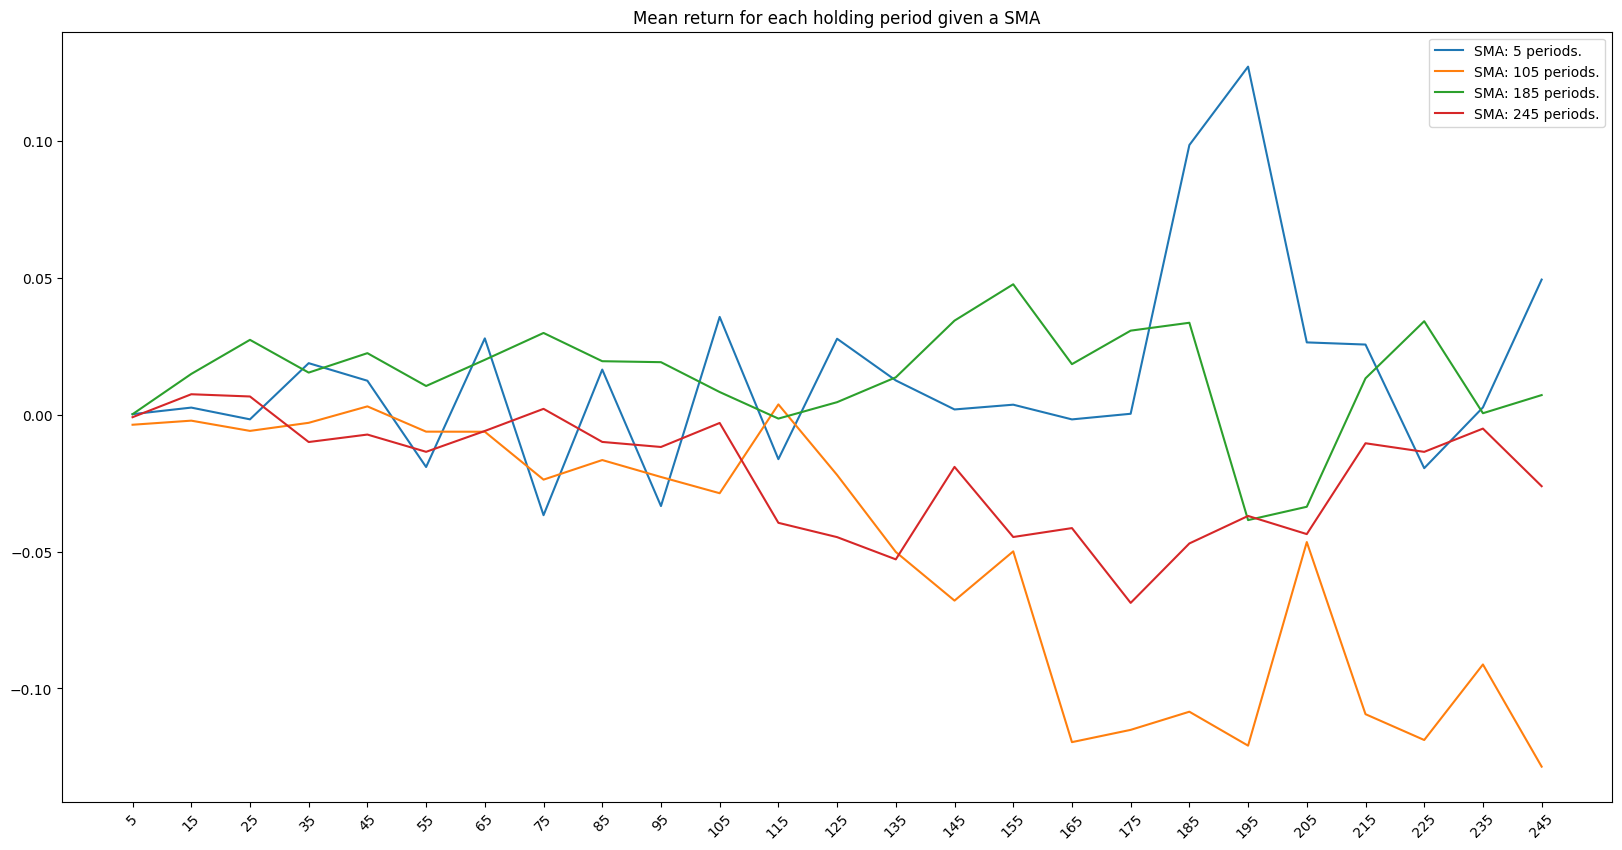

In [38]:
# Plot a chart for a certain SMA_periods with HP on the x-axis and mean on the y-axis
sma_plots = [5,105,185,245]
plt.figure(figsize=(20,10))
plt.title('Mean return for each holding period given a SMA')
for sma_plot in sma_plots:
    df_plot = df_returns[df_returns['SMA_periods']==sma_plot]
    plt.plot(df_plot['HP'],df_plot['mean'],label='SMA: '+str(sma_plot)+' periods.')
    plt.xticks(df_plot['HP'].unique(),rotation=45)
    #plt.plot(df_plot['HP'],df_plot['max'])
    #plt.plot(df_plot['HP'],df_plot['min'])
plt.legend()
plt.show()

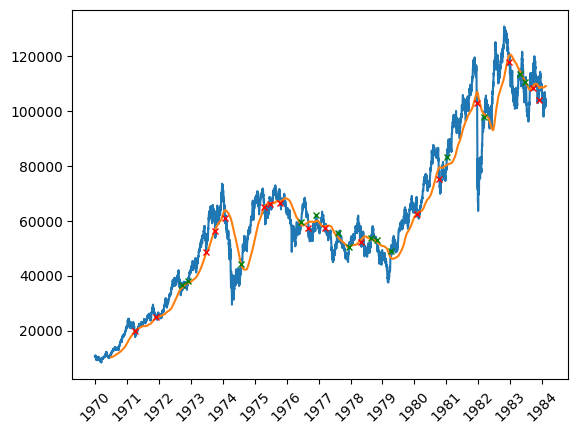

In [60]:
# Filter results to plot buy and sell signals of a certain combination of SMA and holding period
sma_plot = 185
hp_plot = 65
df_plot = df_results.loc[(df_results['SMA_periods']==sma_plot) & (df_results['HP']==hp_plot)].reset_index()
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot['Date'] = [datetime.strftime(x,"%Y-%m-%d") for x in df_plot['Date']]

# Example of a strategy chart with buy and sell signals
buy_signals = df_plot.loc[df_plot['Signal']==1]
sell_signals = df_plot.loc[df_plot['Signal']==-1]
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.plot(df_plot['Date'],df_plot['Close'])
ax.plot(df_plot['Date'],df_plot['SMA'])
for idx in buy_signals.index.tolist():
  ax.plot(
      idx,
      df_plot.loc[idx]["Close"],
      "gx",
      markersize=5
  )
for idx in sell_signals.index.tolist():
  plt.plot(
      idx,
      df_plot.loc[idx]["Close"],
      "rx",
      markersize=5
  )
plt.xticks(rotation=45)
plt.show()